### Dianna Sinicrope
### DSC530 Final Project 
### 8/11/19  
### Analysis of Avocado Sales

In [897]:
# Import avocado data
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import thinkstats2
import thinkplot
import seaborn as sns
import datetime
import sklearn




avocados = pd.read_csv("/Users/dsinicro/Desktop/avocado.csv")

In [898]:
# view the first 10 rows
avocados.head(10)

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,12/27/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,12/20/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,12/13/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,12/6/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,11/29/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
5,5.0,11/22/15,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015.0,Albany
6,6.0,11/15/15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015.0,Albany
7,7.0,11/8/15,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015.0,Albany
8,8.0,11/1/15,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015.0,Albany
9,9.0,10/25/15,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015.0,Albany


In [899]:
print(avocados.describe())

         Unnamed: 0  AveragePrice   TotalVolume          4046          4225  \
count  18249.000000  18250.000000  1.825000e+04  1.825000e+04  1.825000e+04   
mean      24.232232      1.405964  8.506286e+05  2.929924e+05  2.951384e+05   
std       15.481045      0.402670  3.453451e+06  1.264956e+06  1.204089e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083963e+04  8.535750e+02  3.008098e+03   
50%       24.000000      1.370000  1.074040e+05  8.643200e+03  2.905888e+04   
75%       38.000000      1.660000  4.331048e+05  1.110087e+05  1.501663e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.825000e+04  1.825000e+04  1.825000e+04  1.825000e+04   18250.000000   
mean   2.283848e+04  2.396261e+05  1.821847e+05  5.433511e+04    3106.256292   
std    1.074613e+05  9.862170e+05  7.461593e+05 

In [900]:
# I'm going to create a rounded column for Price to the nearest .1

avocados['rounded_price'] = avocados['AveragePrice'].round(1)
avocados.head()


,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,rounded_price
0,0.0,12/27/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,1.3
1,1.0,12/20/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,1.4
2,2.0,12/13/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,0.9
3,3.0,12/6/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,1.1
4,4.0,11/29/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,1.3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4189c4a8>]],
      dtype=object)

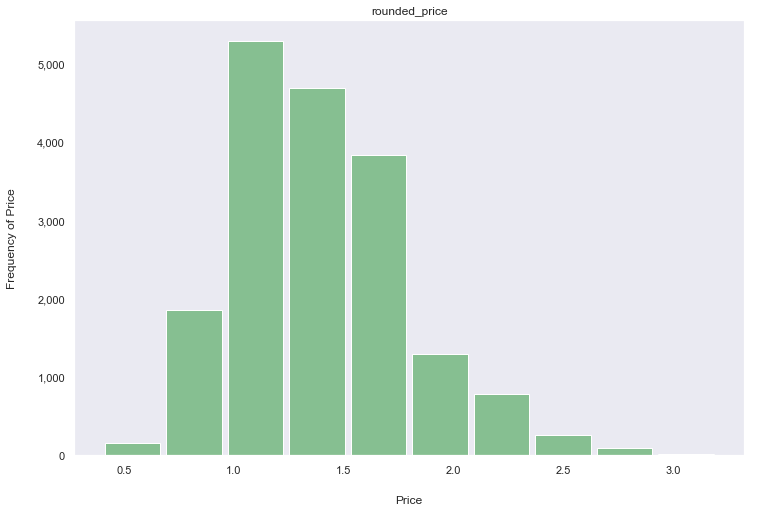

In [901]:
# create a histogram of each variable
hist_price= avocados.hist(column="rounded_price", bins=10, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


ax = hist_price[0]
for x in ax:
# Set x-axis label
    x.set_xlabel("Price", labelpad=20, size=12)

    # Set y-axis label
    x.set_ylabel("Frequency of Price", labelpad=20, size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


hist_price

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a447c2518>]],
      dtype=object)

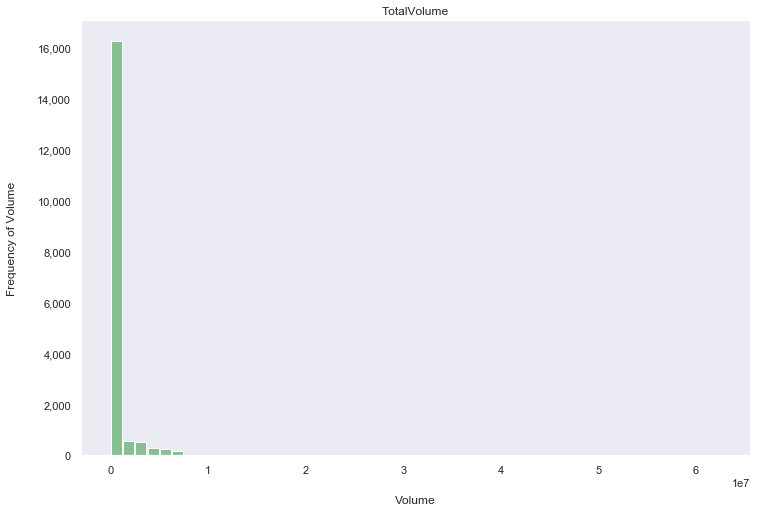

In [902]:
# create a histogram of each variable
hist_totvol= avocados.hist(column="TotalVolume", bins=50, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = hist_totvol[0]
for x in ax:
# Set x-axis label
    x.set_xlabel("Volume", labelpad=20, size=12)

    # Set y-axis label
    x.set_ylabel("Frequency of Volume", labelpad=20, size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    
hist_totvol

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a448030b8>]],
      dtype=object)

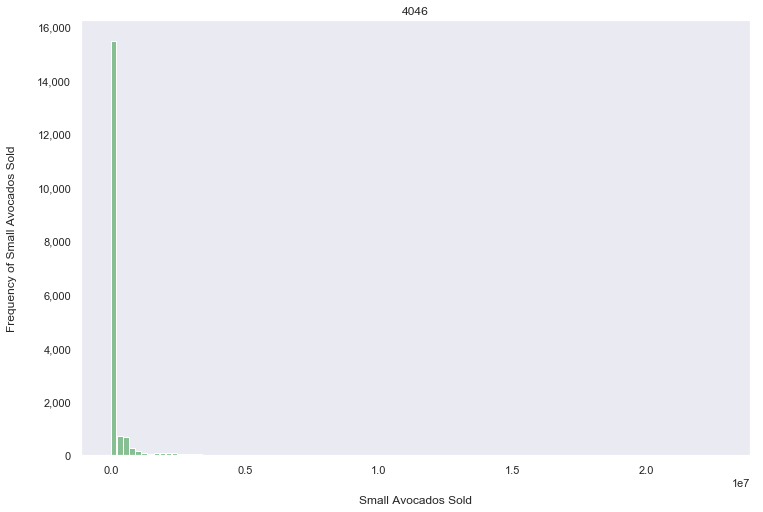

In [903]:
# create a histogram of each variable
hist_small= avocados.hist(column="4046", bins=100, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


ax = hist_small[0]
for x in ax:
# Set x-axis label
    x.set_xlabel("Small Avocados Sold", labelpad=20, size=12)

    # Set y-axis label
    x.set_ylabel("Frequency of Small Avocados Sold", labelpad=20, size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

hist_small

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4457aac8>]],
      dtype=object)

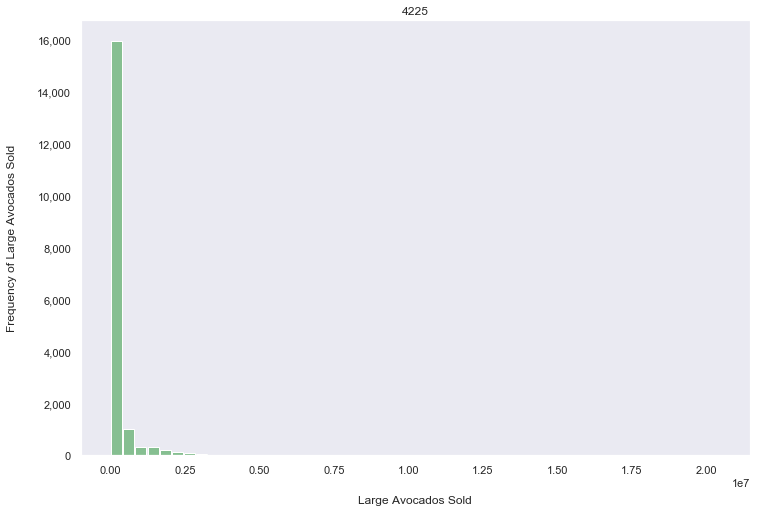

In [904]:
# create a histogram of each variable
hist_large= avocados.hist(column="4225", bins=50, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = hist_large[0]
for x in ax:
# Set x-axis label
    x.set_xlabel("Large Avocados Sold", labelpad=20, size=12)

    # Set y-axis label
    x.set_ylabel("Frequency of Large Avocados Sold", labelpad=20, size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    
hist_large

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a44a82780>]],
      dtype=object)

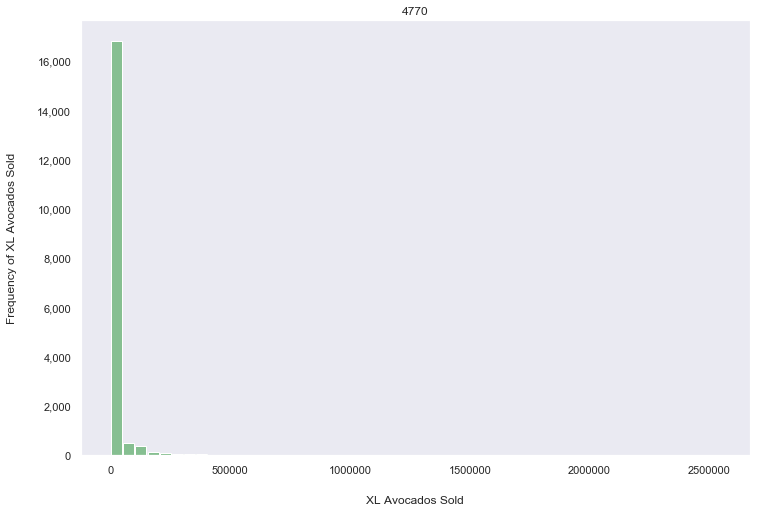

In [905]:
# create a histogram of each variable
hist_xl= avocados.hist(column="4770", bins=50, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = hist_xl[0]
for x in ax:
# Set x-axis label
    x.set_xlabel("XL Avocados Sold", labelpad=20, size=12)

    # Set y-axis label
    x.set_ylabel("Frequency of XL Avocados Sold", labelpad=20, size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


hist_xl

In [906]:

avocados.mean()

Unnamed: 0           24.232232
AveragePrice          1.405964
TotalVolume      850628.599586
4046             292992.369275
4225             295138.395503
4770              22838.484500
Total Bags       239626.071145
Small Bags       182184.703425
Large Bags        54335.110715
XLarge Bags        3106.256292
year               2016.147899
rounded_price         1.406132
dtype: float64

In [907]:
avocados.median()

Unnamed: 0           24.000
AveragePrice          1.370
TotalVolume      107404.000
4046               8643.200
4225              29058.875
4770                184.975
Total Bags        39741.180
Small Bags        26351.615
Large Bags         2647.270
XLarge Bags           0.000
year               2016.000
rounded_price         1.400
dtype: float64

In [908]:
avocados.mode()

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,rounded_price
0,0.0,1/1/17,1.15,569349.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,conventional,2017.0,Albany,1.2
1,1.0,1/10/16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atlanta,NaN
2,2.0,1/11/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BaltimoreWashington,NaN
3,3.0,1/14/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Boise,NaN
4,4.0,1/15/17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Boston,NaN
5,5.0,1/17/16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BuffaloRochester,NaN
6,6.0,1/18/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California,NaN
7,7.0,1/21/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Charlotte,NaN
8,8.0,1/22/17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chicago,NaN
9,9.0,1/24/16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CincinnatiDayton,NaN


In [909]:
avocados.loc[:,"rounded_price"].mode()

0    1.2
dtype: float64

In [910]:
# mode isn't a very good indicator for this dataset since it doesn't tell us anything more about the data

avocados.loc[:,"TotalVolume"].mode()

0    569349.05
dtype: float64

In [911]:
avocados.nlargest(10, ['AveragePrice']) 

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,rounded_price
14125,8.0,10/30/16,3.25,16700.94,2325.93,11142.85,0.00,3232.16,3232.16,0.00,0.0,organic,2016.0,SanFrancisco,3.2
17428,37.0,4/16/17,3.17,3018.56,1255.55,82.31,0.00,1680.70,1542.22,138.48,0.0,organic,2017.0,Tampa,3.2
14124,7.0,11/6/16,3.12,19043.80,5898.49,10039.34,0.00,3105.97,3079.30,26.67,0.0,organic,2016.0,SanFrancisco,3.1
16055,42.0,3/12/17,3.05,2068.26,1043.83,77.36,0.00,947.07,926.67,20.40,0.0,organic,2017.0,MiamiFtLauderdale,3.0
16720,18.0,8/27/17,3.04,12656.32,419.06,4851.90,145.09,7240.27,6960.97,279.30,0.0,organic,2017.0,RaleighGreensboro,3.0
13037,12.0,10/2/16,3.03,3714.71,296.71,2699.80,0.00,718.20,718.20,0.00,0.0,organic,2016.0,LasVegas,3.0
16715,13.0,10/1/17,3.00,10741.93,140.46,4331.20,147.11,6123.16,5873.99,249.17,0.0,organic,2017.0,RaleighGreensboro,3.0
16985,18.0,8/27/17,3.00,19329.49,10517.41,7907.99,0.00,904.09,900.76,3.33,0.0,organic,2017.0,SanFrancisco,3.0
14123,6.0,11/13/16,2.99,18930.40,6204.65,9341.41,0.00,3384.34,3337.67,46.67,0.0,organic,2016.0,SanFrancisco,3.0
15814,13.0,10/1/17,2.99,2819.87,174.13,703.73,12.01,1930.00,1736.97,193.03,0.0,organic,2017.0,Jacksonville,3.0


Perhaps the lowest Average Price of .87 below on 2018-02-04 looks lower than others, but I don't think it's too low.

In [912]:
avocados.nsmallest(10, ['AveragePrice']) 

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,rounded_price
15261,43.0,3/5/17,0.44,64057.04,223.84,4748.88,0.00,59084.32,638.68,58445.64,0.00,organic,2017.0,CincinnatiDayton,0.4
7412,47.0,2/5/17,0.46,2200550.27,1200632.86,531226.65,18324.93,450365.83,113752.17,330583.10,6030.56,conventional,2017.0,PhoenixTucson,0.5
15473,43.0,3/5/17,0.48,50890.73,717.57,4138.84,0.00,46034.32,1385.06,44649.26,0.00,organic,2017.0,Detroit,0.5
1716,0.0,12/27/15,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.00,conventional,2015.0,PhoenixTucson,0.5
15262,44.0,2/26/17,0.49,44024.03,252.79,4472.68,0.00,39298.56,600.00,38698.56,0.00,organic,2017.0,CincinnatiDayton,0.5
1752,36.0,4/19/15,0.51,1366844.88,1097285.22,164460.99,7534.30,97564.37,44646.67,52917.70,0.00,conventional,2015.0,PhoenixTucson,0.5
4566,42.0,3/6/16,0.51,1442973.47,1037699.01,259846.68,14567.40,130860.38,76814.40,54045.98,0.00,conventional,2016.0,PhoenixTucson,0.5
6622,52.0,1/1/17,0.51,1475741.07,985040.19,290583.75,6313.88,193803.25,62497.42,131305.83,0.00,conventional,2017.0,Houston,0.5
15263,45.0,2/19/17,0.51,41987.86,225.44,5734.39,0.00,36028.03,473.98,35554.05,0.00,organic,2017.0,CincinnatiDayton,0.5
16162,43.0,3/5/17,0.51,17135.45,481.81,1790.33,0.00,14863.31,122.78,14740.53,0.00,organic,2017.0,Nashville,0.5


In [913]:
avocados.nlargest(10, ['TotalVolume']) 

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,rounded_price
9097,7.0,2/4/18,0.87,62505646.52,21620180.90,20445501.03,1066830.22,19373134.37,13384586.80,5719096.61,269450.96,conventional,2018.0,TotalUS,0.9
8366,47.0,2/5/17,0.77,61034457.10,22743616.17,20328161.55,1664383.09,16298296.29,12567155.58,3618270.75,112869.96,conventional,2017.0,TotalUS,0.8
5506,46.0,2/7/16,0.76,52288697.89,16573573.78,20470572.61,2546439.11,12698112.39,9083373.04,3373077.87,241661.48,conventional,2016.0,TotalUS,0.8
8353,34.0,5/7/17,1.09,47293921.60,17076650.82,13549102.59,863471.88,15804696.31,11228049.63,4324231.19,252415.49,conventional,2017.0,TotalUS,1.1
5493,33.0,5/8/16,0.82,46324529.70,14223304.98,17896391.60,1993645.36,12211187.76,8747756.84,3342780.83,120650.09,conventional,2016.0,TotalUS,0.8
2699,47.0,2/1/15,0.89,44655461.51,18933038.04,18956479.74,1381516.11,5384427.62,4216452.03,1121076.47,46899.12,conventional,2015.0,TotalUS,0.9
9090,0.0,3/25/18,1.03,43409835.75,14130799.10,12125711.42,758801.12,16394524.11,12540327.19,3544729.39,309467.53,conventional,2018.0,TotalUS,1.0
9096,6.0,2/11/18,0.97,43167806.09,15870677.70,11541844.87,652856.58,15102426.94,10844852.22,4023485.04,234089.68,conventional,2018.0,TotalUS,1.0
9099,9.0,1/21/18,1.08,42939821.55,14218843.83,13929702.12,928815.12,13862460.48,9866218.28,3789722.90,206519.30,conventional,2018.0,TotalUS,1.1
5494,34.0,5/1/16,0.84,42867608.54,13748944.38,15899858.37,1414364.49,11804441.30,8376124.32,3365582.11,62734.87,conventional,2016.0,TotalUS,0.8


In [914]:
avocados.nsmallest(10, ['TotalVolume']) 

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,rounded_price
10381,7.0,11/8/15,1.59,84.56,3.95,3.95,0.0,76.66,73.33,3.33,0.0,organic,2015.0,MiamiFtLauderdale,1.6
9437,51.0,1/4/15,1.73,379.82,0.00,59.82,0.0,320.00,320.00,0.00,0.0,organic,2015.0,BuffaloRochester,1.7
13189,8.0,10/30/16,1.58,385.55,8.13,47.42,0.0,330.00,330.00,0.00,0.0,organic,2016.0,MiamiFtLauderdale,1.6
11698,24.0,7/12/15,2.05,419.98,0.00,63.42,0.0,356.56,356.56,0.00,0.0,organic,2015.0,Syracuse,2.0
13193,12.0,10/2/16,1.49,472.82,10.50,18.99,0.0,443.33,440.00,3.33,0.0,organic,2016.0,MiamiFtLauderdale,1.5
11697,23.0,7/19/15,2.07,482.26,0.00,75.74,0.0,406.52,406.52,0.00,0.0,organic,2015.0,Syracuse,2.1
16201,29.0,6/11/17,2.19,515.01,399.62,5.92,0.0,109.47,106.14,3.33,0.0,organic,2017.0,NewOrleansMobile,2.2
9426,40.0,3/22/15,1.93,530.96,0.00,147.63,0.0,383.33,383.33,0.00,0.0,organic,2015.0,BuffaloRochester,1.9
13190,9.0,10/23/16,1.58,542.85,8.14,81.38,0.0,453.33,450.00,3.33,0.0,organic,2016.0,MiamiFtLauderdale,1.6
11719,45.0,2/15/15,1.72,561.10,0.00,47.64,0.0,513.46,513.46,0.00,0.0,organic,2015.0,Syracuse,1.7


In [915]:
# Calculate spread
avocados.var()

Unnamed: 0       2.396627e+02
AveragePrice     1.621431e-01
TotalVolume      1.192633e+13
4046             1.600114e+12
4225             1.449831e+12
4770             1.154792e+10
Total Bags       9.726239e+11
Small Bags       5.567537e+11
Large Bags       5.951629e+10
XLarge Bags      3.130219e+08
year             8.834843e-01
rounded_price    1.628902e-01
dtype: float64

In [916]:
# Calculate standard deviation
avocados.std()

Unnamed: 0       1.548104e+01
AveragePrice     4.026700e-01
TotalVolume      3.453451e+06
4046             1.264956e+06
4225             1.204089e+06
4770             1.074613e+05
Total Bags       9.862170e+05
Small Bags       7.461593e+05
Large Bags       2.439596e+05
XLarge Bags      1.769242e+04
year             9.399385e-01
rounded_price    4.035966e-01
dtype: float64

In [917]:
# print tail
avocados.tail()

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,rounded_price
18247,10.0,1/14/18,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018.0,WestTexNewMexico,1.9
18248,11.0,1/7/18,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018.0,WestTexNewMexico,1.6
18249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18250,NaN,NaN,1.15,569349.05,0.00,0.00,0.00,0.00,0.00,0.00,0.0,NaN,NaN,NaN,1.2
18251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [918]:
# Trying from Think Stats
avgprice= avocados["rounded_price"] # assigns variable name to the Average Price column

hist= thinkstats2.Hist(avgprice, label='rounded_price')  # assigns variable name hist and counts frequency of avg prices

In [919]:
n = hist.Total()  # .Total counts the total counts from thinkstats2
pmf = hist.Copy()  # .Copy returns a copy from thinkstats2. From author: Pmf objects provide a Copy method so you can make and modify a copy without affecting the original.
for x, freq in hist.Items():  # .Items gets an unsorted sequence of (value, freq/prob) pairs. I think: hist.Items takes hist (which was the frequency counts of x and breaks each pair of (frequency count, x) into it's own item so that the next line can be computed. )
    pmf[x] = freq / n  

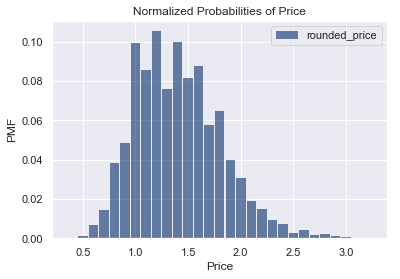

In [920]:
thinkplot.Hist(pmf)  # Instead of the non-normalized plot that we created above, takes pmf that we just calculated and groups it back together for chart
thinkplot.Config(title = 'Normalized Probabilities of Price', xlabel='Price', ylabel='PMF')  # labels with my own added chart title

In [921]:
# p. 23 of book
organic = avocados[avocados.type == 'organic']
conventional = avocados[avocados.type == 'conventional']

# organic_hist = thinkstats2.Hist(organic.AveragePrice)
# conventional_hist = thinkstats2.Hist(conventional.AveragePrice)

organic_pmf = thinkstats2.Pmf(organic.rounded_price, label='organic')  # counts frequency of first pregnancy lengths
conventional_pmf = thinkstats2.Pmf(conventional.rounded_price, label='conventional')  # counts frequency of non-first pregnancy lengths


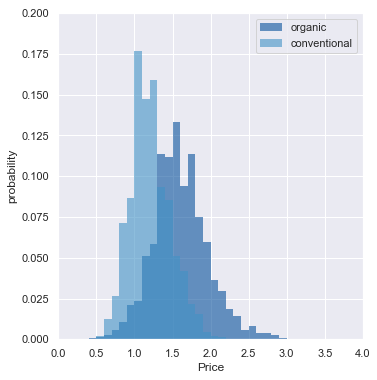

In [922]:
thinkplot.PrePlot(2, cols =2)
thinkplot.Hist(organic_pmf, align='right', width= .1)
thinkplot.Hist(conventional_pmf, align='left',width= .1)
thinkplot.Config(xlabel='Price',ylabel='probability',axis=[0,4,0,.2])

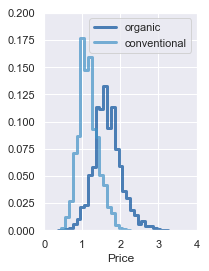

In [923]:
# Creating step chart since there's overlap in the chart above. Step is easier to see.
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)  
thinkplot.Pmfs([organic_pmf, conventional_pmf])  # step charts
thinkplot.Config(xlabel='Price', axis=[0,4,0,.2])

In [924]:
# Create CDF

x = np.sort(avocados['AveragePrice']) # sorts the column first
y = np.arange(1, len(x)+1 / len(x))


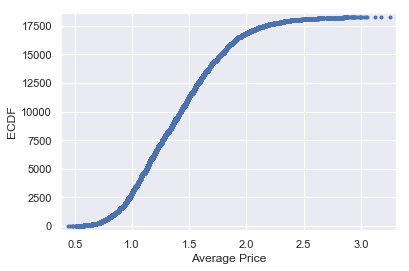

In [925]:
_ = plt.plot(x, y, marker='.', linestyle='none') # plots what I defined above
_ = plt.xlabel('Average Price') # x axis label
_ = plt.ylabel('ECDF') # y axis label
plt.margins(0.02) # keeps data off plot edges
plt.show()

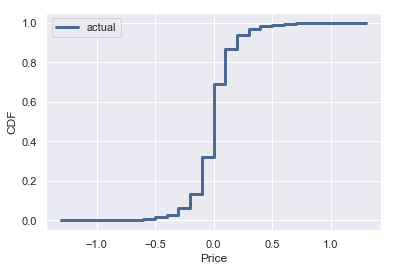

<Figure size 576x432 with 0 Axes>

In [926]:
# Book's way of calculating CDF of Actual Prices

diffs = avocados.rounded_price.diff()
cdf = thinkstats2.Cdf(diffs, label='actual')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Price', ylabel='CDF')


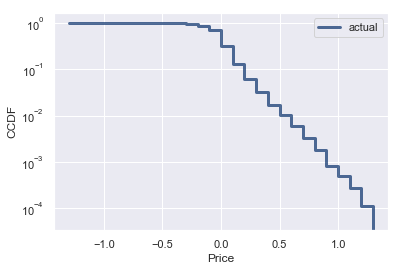

<Figure size 576x432 with 0 Axes>

In [927]:
# Plot 1 analytical distribution 
# Complimentary CDF p 59

thinkplot.Cdf(cdf, complement=True)
thinkplot.Show(xlabel='Price', ylabel='CCDF', yscale='log')


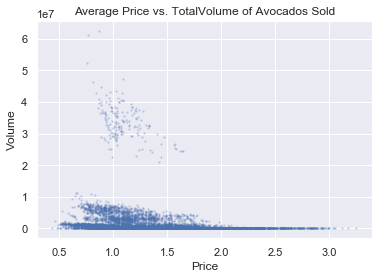

In [928]:
# Create a scatter plot

plt.scatter(avocados.AveragePrice, avocados.TotalVolume, alpha=0.2, s = 2)
plt.title('Average Price vs. TotalVolume of Avocados Sold')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.show()


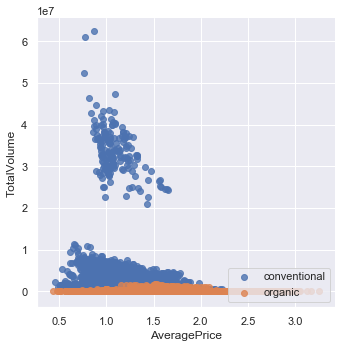

In [929]:
# Create a scatter plot color by group

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="AveragePrice", y="TotalVolume", data=avocados, fit_reg=False, hue='type', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 


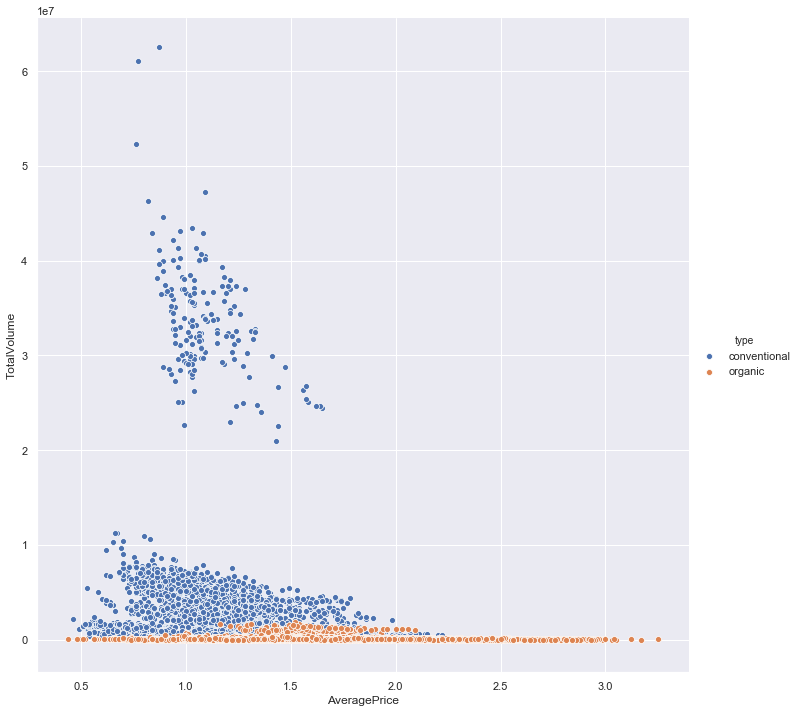

In [930]:
# Another way to use seaborn for scatter plots
# Looks like higher volumes of conventional avocados are sold

sns.pairplot(x_vars=["AveragePrice"], y_vars=["TotalVolume"], data=avocados, hue="type", height = 10)

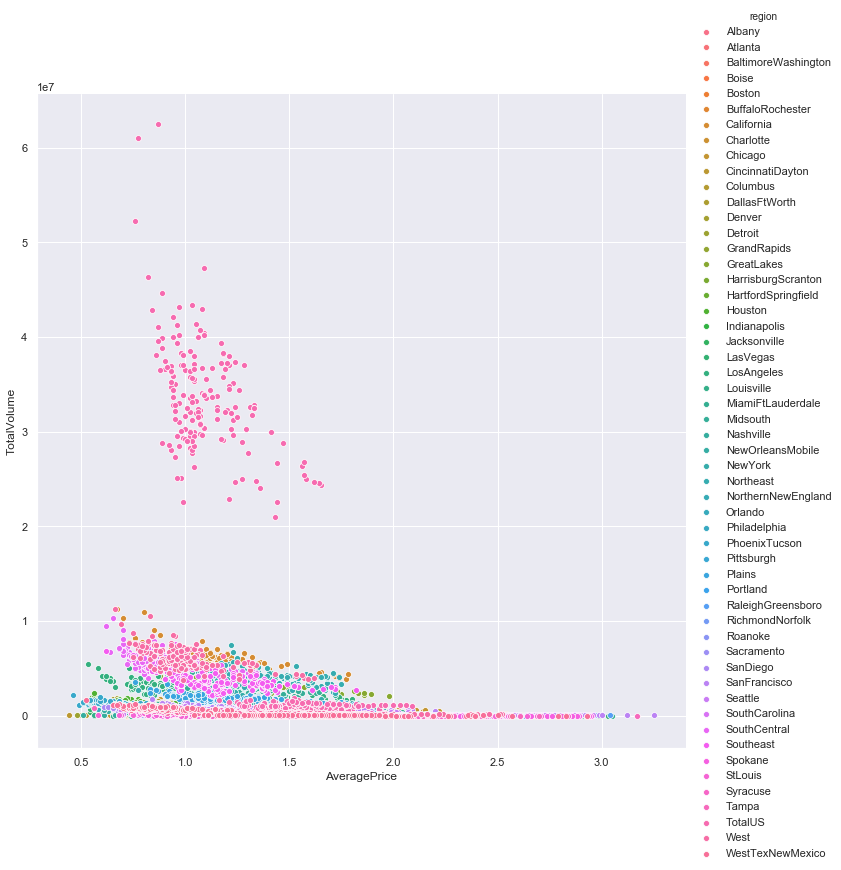

In [931]:
# Too many regions to really get anything out of this

sns.pairplot(x_vars=["AveragePrice"], y_vars=["TotalVolume"], data=avocados, hue="region", height = 10)

In [932]:
# add sortable date column with YYYY-MM-DD format

avocados['DS_date'] = pd.to_datetime(avocados['Date'])
avocados.head()

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,rounded_price,DS_date
0,0.0,12/27/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,1.3,2015-12-27
1,1.0,12/20/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,1.4,2015-12-20
2,2.0,12/13/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,0.9,2015-12-13
3,3.0,12/6/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,1.1,2015-12-06
4,4.0,11/29/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,1.3,2015-11-29


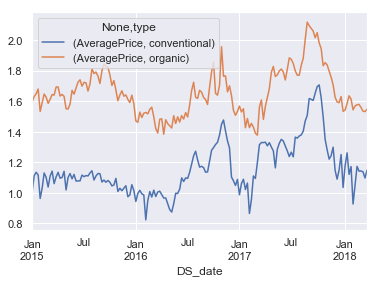

In [933]:
# Line chart of prices of avocados by type sold over time

price_type = pd.pivot_table(avocados,index=["DS_date"], columns=['type'], values=['AveragePrice'], aggfunc='mean')
price_type.plot()

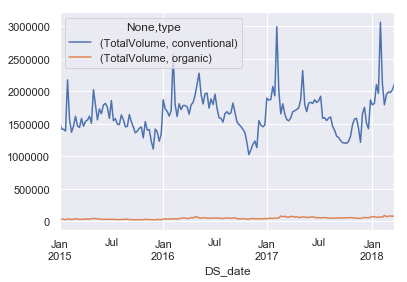

In [934]:
# Line chart of volume of avocados by type sold over time

volume_type = pd.pivot_table(avocados,index=["DS_date"], columns=['type'], values=['TotalVolume'], aggfunc='mean')
volume_type.plot()

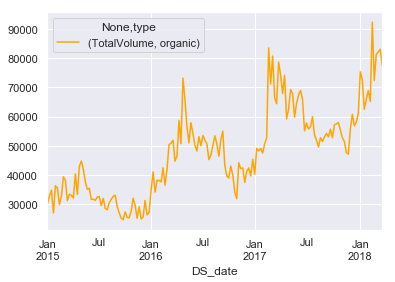

In [935]:
# Zoom of organic line chart of prices of avocados by type (organic only) sold over time

volumeorganic_type = avocados[avocados.type == 'organic'].pivot_table(index=["DS_date"], columns=['type'], values=['TotalVolume'], aggfunc='mean')
volumeorganic_type.plot(kind = 'line', color = 'orange')

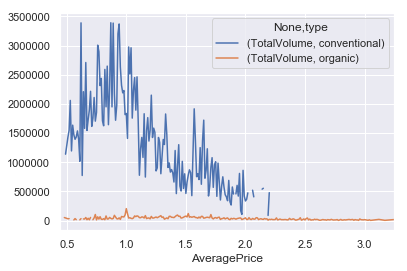

In [936]:
# Line chart of volume and price of avocados by type sold over time

volume_price = avocados.pivot_table(index=["AveragePrice"], columns=['type'], values=['TotalVolume'], aggfunc='mean')
volume_price.plot()

In [937]:
# correlation of all variables

correlation = avocados.corr()
correlation

,Unnamed: 0,AveragePrice,TotalVolume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,rounded_price
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667,-0.132853
AveragePrice,-0.133008,1.000000,-0.192747,-0.208306,-0.172917,-0.179436,-0.177077,-0.174719,-0.172930,-0.117584,0.093197,0.997367
TotalVolume,0.014035,-0.192747,1.000000,0.977863,0.974180,0.872202,0.963046,0.967238,0.880639,0.747157,0.017193,-0.192292
4046,0.017628,-0.208306,0.977863,1.000000,0.926110,0.833390,0.920057,0.925280,0.838645,0.699378,0.003353,-0.207707
4225,0.019829,-0.172917,0.974180,0.926110,1.000000,0.887855,0.905788,0.916032,0.810016,0.688809,-0.009559,-0.172699
4770,0.041752,-0.179436,0.872202,0.833390,0.887855,1.000000,0.792315,0.802733,0.698472,0.679862,-0.036531,-0.179644
Total Bags,-0.002219,-0.177077,0.963046,0.920057,0.905788,0.792315,1.000000,0.994335,0.943009,0.804233,0.071552,-0.176500
Small Bags,0.000347,-0.174719,0.967238,0.925280,0.916032,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.174164
Large Bags,-0.009196,-0.172930,0.880639,0.838645,0.810016,0.698472,0.943009,0.902589,1.000000,0.710859,0.087891,-0.172324
XLarge Bags,-0.011546,-0.117584,0.747157,0.699378,0.688809,0.679862,0.804233,0.806845,0.710859,1.000000,0.081033,-0.117173


In [938]:
# correlation of 2 variables

corr2= (avocados[['AveragePrice','TotalVolume']].corr())
corr2

,AveragePrice,TotalVolume
AveragePrice,1.000000,-0.192747
TotalVolume,-0.192747,1.000000


In [939]:
# correlation of organic vs conventional avocados
corr3 = price_type.corr()
corr3


AveragePrice          
type                      conventional   organic
             type                               
AveragePrice conventional     1.000000  0.765123
             organic          0.765123  1.000000

In [940]:
# covariance of all variables

covariance = avocados.cov()
covariance

,Unnamed: 0,AveragePrice,TotalVolume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,rounded_price
Unnamed: 0,239.662747,-0.829154,7.503966e+05,3.452121e+05,3.696355e+05,6.946027e+04,-3.388524e+04,4.007833e+03,-3.473064e+04,-3.162427e+03,-2.497961,-0.830098
AveragePrice,-0.829154,0.162143,-2.680347e+05,-1.061029e+05,-8.383894e+04,-7.764467e+03,-7.032090e+04,-5.249538e+04,-1.698783e+04,-8.376937e+02,0.035274,0.162088
TotalVolume,750396.607100,-268034.737477,1.192633e+13,4.271758e+12,4.050898e+12,3.236848e+11,3.279994e+12,2.492402e+12,7.419409e+11,4.565126e+10,55810.254638,-268017.211045
4046,345212.144249,-106102.914904,4.271758e+12,1.600114e+12,1.410577e+12,1.132858e+11,1.147791e+12,8.733338e+11,2.588045e+11,1.565218e+10,3987.170132,-106040.911868
4225,369635.513087,-83838.937041,4.050898e+12,1.410577e+12,1.449831e+12,1.148822e+11,1.075617e+12,8.230016e+11,2.379415e+11,1.467389e+10,-10818.947174,-83926.108952
4770,69460.271783,-7764.467016,3.236848e+11,1.132858e+11,1.148822e+11,1.154792e+10,8.396962e+10,6.436575e+10,1.831128e+10,1.292587e+09,-3689.946549,-7791.353970
Total Bags,-33885.242353,-70320.899072,3.279994e+12,1.147791e+12,1.075617e+12,8.396962e+10,9.726239e+11,7.317059e+11,2.268853e+11,1.403271e+10,66329.581266,-70252.861619
Small Bags,4007.832979,-52495.380077,2.492402e+12,8.733338e+11,8.230016e+11,6.436575e+10,7.317059e+11,5.567537e+11,1.643008e+11,1.065146e+10,44827.328787,-52448.947961
Large Bags,-34730.638168,-16987.825205,7.419409e+11,2.588045e+11,2.379415e+11,1.831128e+10,2.268853e+11,1.643008e+11,5.951629e+10,3.068236e+09,20154.653415,-16967.225168
XLarge Bags,-3162.426750,-837.693669,4.565126e+10,1.565218e+10,1.467389e+10,1.292587e+09,1.403271e+10,1.065146e+10,3.068236e+09,3.130219e+08,1347.598787,-836.688364


In [941]:
# covariance of organic and conventional avocado prices
cov3 = price_type.cov()
cov3

AveragePrice          
type                      conventional   organic
             type                               
AveragePrice conventional     0.028874  0.019897
             organic          0.019897  0.023420

In [942]:
# means
# organic avocados are usually more expensive
mean3 = price_type.mean()
mean3

              type        
AveragePrice  conventional    1.158040
              organic         1.654036
dtype: float64

In [943]:
# median
median3 = price_type.median()
median3


              type        
AveragePrice  conventional    1.115370
              organic         1.634444
dtype: float64

In [944]:
# mode
mode3 = price_type.mode()
mode3

AveragePrice         
type conventional  organic
0        1.009630  1.62500
1        1.082778  1.76963
2        1.133333      NaN
3        1.274074      NaN

In [945]:
#find tail

price_type.tail()

AveragePrice          
type       conventional   organic
DS_date                          
2018-02-25     1.141111  1.578148
2018-03-04     1.142407  1.557963
2018-03-11     1.136667  1.533519
2018-03-18     1.096296  1.531111
2018-03-25     1.147222  1.546481

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a39592f98>,
      dtype=object)

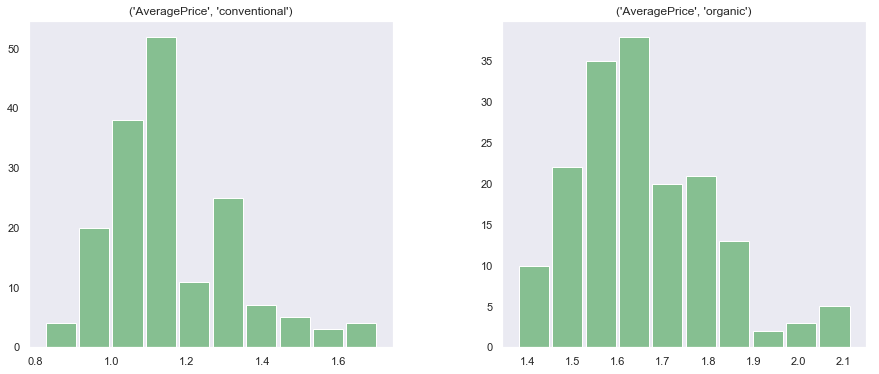

In [946]:
# histogram organic prices
hist_type_price= price_type.hist(column="AveragePrice", bins=10, grid=False, figsize=(15,6), color='#86bf91', zorder=2, rwidth=0.9)

ax = hist_large[0]
for x in ax:
# Set x-axis label
    x.set_xlabel("Price of Avocados", labelpad=20, size=12)

    # Set y-axis label
    x.set_ylabel("Frequency of Avocado Prices", labelpad=20, size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    
hist_type_price

In [947]:
# groupby_date= avocados.groupby('DS_date')
# print(groupby_date)

# organic_only =avocados.groupby(['DS_date'])
# organic_only


long_table = pd.pivot_table(avocados, 'AveragePrice', ['type'], 'DS_date')

In [948]:
long_tableT= long_table.T

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3ce19240>]],
      dtype=object)

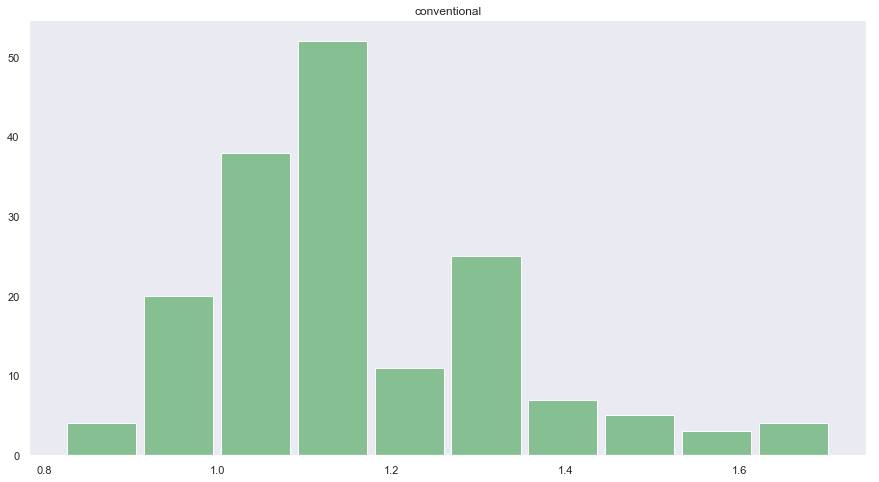

In [949]:
# histogram organic prices
hist_long_tableT= long_tableT.hist(column="conventional", bins=10, grid=False, figsize=(15,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = hist_large[0]
for x in ax:
# Set x-axis label
    x.set_xlabel("Price of Conventional Avocados", labelpad=10, size=16)

    # Set y-axis label
    x.set_ylabel("Frequency of Conventional Avocado Prices", labelpad=10, size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    
hist_long_tableT

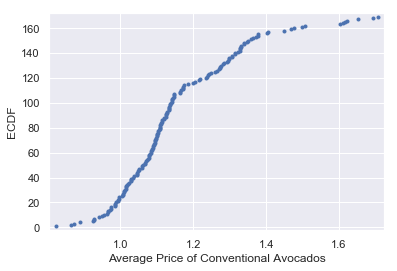

In [950]:
# Create CDF of conventional prices

x = np.sort(long_tableT['conventional']) # sorts the column first
y = np.arange(1, len(x)+1 / len(x))


_ = plt.plot(x, y, marker='.', linestyle='none') # plots what I defined above
_ = plt.xlabel('Average Price of Conventional Avocados') # x axis label
_ = plt.ylabel('ECDF') # y axis label
plt.margins(0.02) # keeps data off plot edges
plt.show()

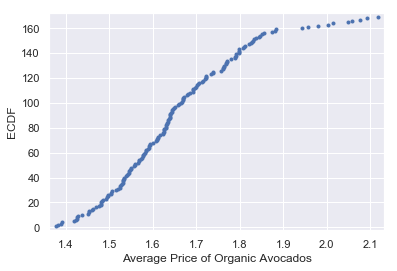

In [951]:
# Create CDF of corganic prices

x = np.sort(long_tableT['organic']) # sorts the column first
y = np.arange(1, len(x)+1 / len(x))


_ = plt.plot(x, y, marker='.', linestyle='none') # plots what I defined above
_ = plt.xlabel('Average Price of Organic Avocados') # x axis label
_ = plt.ylabel('ECDF') # y axis label
plt.margins(0.02) # keeps data off plot edges
plt.show()

In [952]:
# permutation test of organic and conventional prices

z =long_tableT.organic
y =long_tableT.conventional

theta_hat = z.mean() - y.mean()
print(theta_hat)


0.49599630332576616


In [953]:
# Calculate Peason's coefficient

np.corrcoef(z, y)[0, 1]

0.7651230672855825

In [954]:
# test correlation

long_tableT.corr()

type,conventional,organic
type,,
conventional,1.000000,0.765123
organic,0.765123,1.000000


In [955]:
# Conduct a test on your hypothesis using one of the methods covered in Chapter 9.
# Permutation test

class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [956]:
cleaned = long_tableT.dropna(subset=['organic', 'conventional'])
data = cleaned.organic.values, cleaned.conventional.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

The reported p-value is 0, which means that in 1000 trials we didn't see a correlation, under the null hypothesis, that exceeded the observed correlation. That means that the p-value is probably smaller than  1/1000 , but it is not actually 0

In [957]:
# Can't get linear fit to work
# Conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11)
# Linear fit

# Sample data
x = avocados.DS_date
y = avocados.AveragePrice

# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()


TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('float64')

In [ ]:
# Can't get linear fit to work
plt.scatter(avocados.AveragePrice, avocados.TotalVolume, alpha=0.2, s = 2)
plt.title('Average Price vs. TotalVolume of Avocados Sold')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.show()


In [ ]:
# Can't get linear fit to work
lm.predict(avocados.AveragePrice)[0:5]

In [ ]:
# Can't get linear fit to work
# Correlation coefficients measure the strength of a relationship betwen variables, but not the slope. Linear least square will estimate the slope.

from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx # establishes relationship between x and y for slope
    inter = meany - slope * meanx # uses slope and meanx to find the intercept

    return inter, slope

In [ ]:
# Can't get linear fit to work
# will return the fitted line for a sequence of x

def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [ ]:
# Can't get linear fit to work
fit_xs, fit_ys = FitLine(avocados.AveragePrice, inter, slope)

In [ ]:
# Can't get linear fit to work
# good to look at a model like this to see if the line is a good fit for the data

thinkplot.Scatter(avocados.AveragePrice, avocados.DS_date, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Average Price",
                 ylabel='Date',
                 axis=[10, 45, 0, 15],
                 legend=False)

In [ ]:
# Can't get this to work. Confidence Intervals from Think Stats

def PlotConfidenceIntervals(xs, inters, slopes, percent=90, **options):
    fys_seq = []
    for inter, slope in zip(inters, slopes):
        fxs, fys = FitLine(xs, inter, slope)
        fys_seq.append(fys)

    p = (100 - percent) / 2
    percents = p, 100 - p
    low, high = thinkstats2.PercentileRows(fys_seq, percents)
    thinkplot.FillBetween(fxs, low, high, **options)

In [ ]:
# Can't get this to work. Confidence Intervals from Think Stats

PlotConfidenceIntervals(avocados.AveragePrice, inters, slopes, percent=90, 
                        color='gray', alpha=0.3, label='90% CI')
PlotConfidenceIntervals(avocados.AveragePrice, inters, slopes, percent=50,
                        color='gray', alpha=0.5, label='50% CI')

thinkplot.Config(xlabel="Mother's age (years)",
                 ylabel='Residual (lbs)',
                 xlim=[10, 45])